In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [2]:
#import the data
USDCAD = yf.Ticker("USDCAD=X")

In [3]:
data = yf.download("USDCAD=X", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Date
2017-01-02    1.34340
2017-01-03    1.34414
2017-01-04    1.34218
2017-01-05    1.32990
2017-01-06    1.32294
Name: Adj Close, dtype: float64

In [5]:
data.tail()

Date
2022-08-04    1.28536
2022-08-05    1.28702
2022-08-08    1.29445
2022-08-09    1.28570
2022-08-10    1.28859
Name: Adj Close, dtype: float64

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

Date
2022-08-04   -0.002665
2022-08-05    0.001291
2022-08-08    0.005756
2022-08-09   -0.006783
2022-08-10    0.002245
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price CAD')

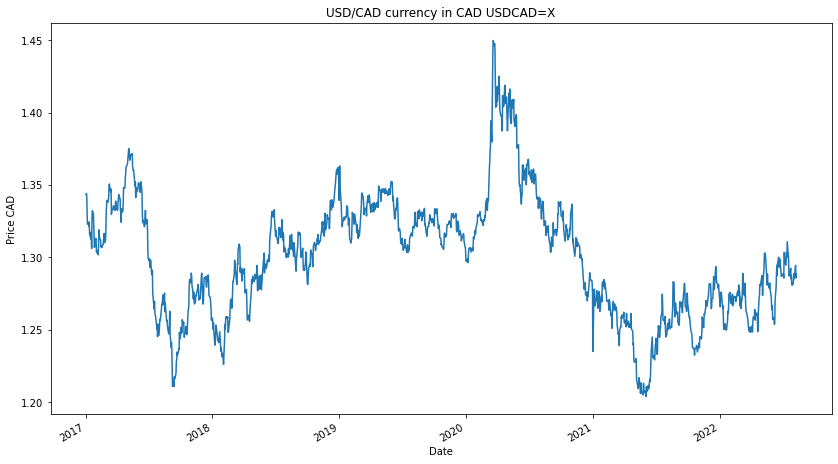

In [8]:
data.plot(figsize=(14,8))
plt.title('USD/CAD currency in CAD USDCAD=X')
plt.ylabel('Price CAD')

In [9]:
u = log_returns.mean()
u

-2.8550481878149816e-05

In [10]:
var = log_returns.var()
var

1.9935601931698704e-05

In [11]:
stdev = log_returns.std()
stdev

0.004464930226968693

In [12]:
drift = u - (0.5 * var)
drift

-3.851828284399917e-05

In [13]:
np.array(drift)

array(-3.85182828e-05)

In [14]:
np.array(stdev)

array(0.00446493)

In [15]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [16]:
x = np.random.rand(10,2)
x

array([[0.70667616, 0.03829264],
       [0.57002382, 0.91666264],
       [0.60800357, 0.47014995],
       [0.63303659, 0.51278501],
       [0.10731   , 0.15933505],
       [0.2897572 , 0.39802347],
       [0.8917733 , 0.84556768],
       [0.81092364, 0.43178243],
       [0.83076981, 0.17224606],
       [0.12589677, 0.58997467]])

In [17]:
norm.ppf(x)

array([[ 0.54370035, -1.77085226],
       [ 0.1764348 ,  1.38296789],
       [ 0.27411942, -0.07489293],
       [ 0.33990666,  0.03205276],
       [-1.24096144, -0.99719453],
       [-0.55409418, -0.25846645],
       [ 1.23601392,  1.01760724],
       [ 0.88130509, -0.17183804],
       [ 0.95721175, -0.94532667],
       [-1.1460039 ,  0.22747983]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.46165805, -0.63675531],
       [-0.03580995,  0.10092267],
       [ 0.51399027,  0.67283645],
       [-0.97390297,  1.80521125],
       [ 0.52736603, -0.22750401],
       [ 1.23552491,  0.68352712],
       [ 0.37244979, -0.35640707],
       [ 0.40080534,  0.05645115],
       [ 0.78497818, -0.20389953],
       [-0.56826511,  0.79389544]])

In [19]:
t_intervals = 120
interations = 500

In [20]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.98969182, 0.9957773 , 0.99867067, ..., 0.99704014, 0.99942419,
        0.99535917],
       [0.99652238, 0.99674736, 1.00465415, ..., 0.99711005, 0.99909907,
        0.99557718],
       [0.99599888, 1.00222631, 1.00436083, ..., 0.99792021, 0.9983795 ,
        1.00292133],
       ...,
       [1.00482069, 1.00466441, 1.00122711, ..., 0.99618242, 0.99904008,
        0.99769286],
       [1.00137854, 1.00335653, 0.99230549, ..., 0.98835418, 0.99122575,
        1.00933172],
       [0.99705988, 1.00033325, 0.99701671, ..., 0.99491711, 1.00101211,
        0.99656994]])

In [21]:
s_zero = data.iloc[-1]
s_zero

1.2885899543762207

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0] = s_zero
price_list

array([[1.28858995, 1.28858995, 1.28858995, ..., 1.28858995, 1.28858995,
        1.28858995],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [26]:
price_list

array([[1.28858995, 1.28858995, 1.28858995, ..., 1.28858995, 1.28858995,
        1.28858995],
       [1.28410873, 1.28439863, 1.29458725, ..., 1.28486599, 1.28742903,
        1.28289076],
       [1.27897086, 1.2872581 , 1.30023272, ..., 1.28219374, 1.28534276,
        1.2866385 ],
       ...,
       [1.28877903, 1.3016899 , 1.26589092, ..., 1.27122431, 1.27896531,
        1.47924956],
       [1.29055566, 1.30605906, 1.25615051, ..., 1.25641986, 1.26774335,
        1.49305349],
       [1.28676127, 1.3064943 , 1.25240305, ..., 1.25003362, 1.26902644,
        1.48793222]])

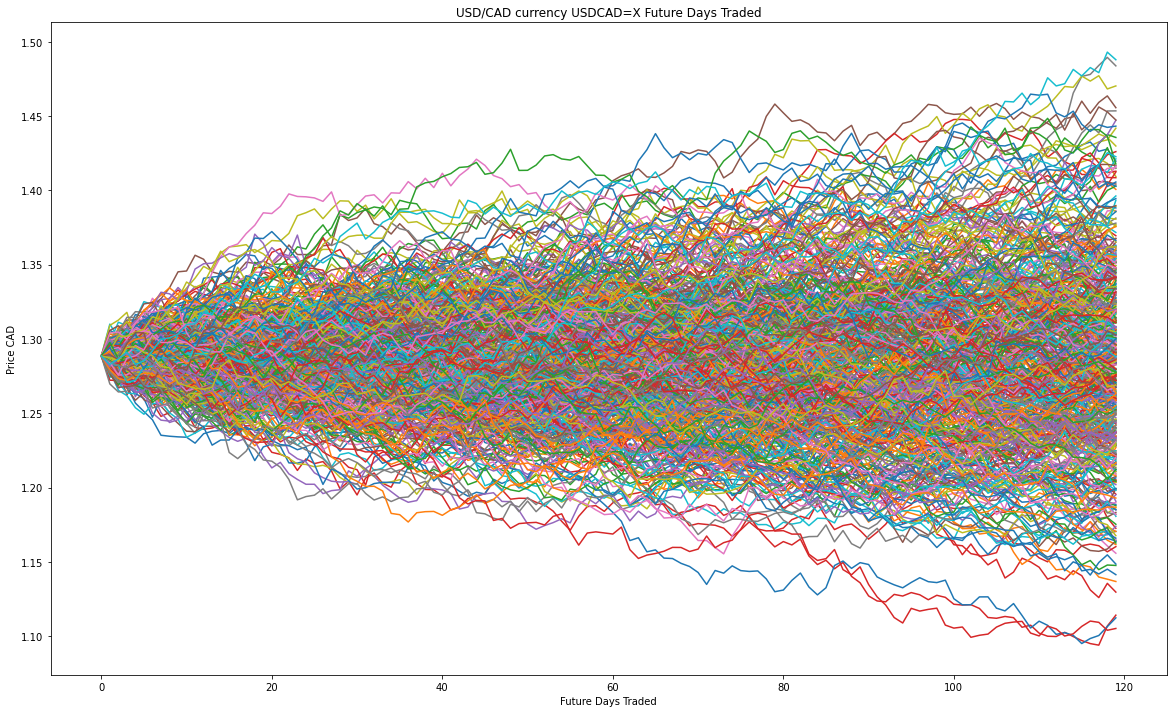

In [27]:
plt.figure(figsize=(20,12))
plt.title('USD/CAD currency USDCAD=X Future Days Traded')
plt.xlabel('Future Days Traded')
plt.ylabel('Price CAD')
plt.plot(price_list)